# WholeSale Data Clustering

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [3]:
df= pd.read_csv('Wholesale_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.shape

(440, 8)

In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [9]:
data= df.iloc[:,2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [11]:
from sklearn.cluster import KMeans

WCSS
 [157595857165.60907, 113217528520.90994, 80332413843.01636, 64855545528.21104, 52928148942.57611, 47525452877.90758, 41158638815.56956, 35982756928.00334, 33308797243.47746, 30259086389.915966, 27544761990.52861, 26715651952.9848, 24650810900.65626, 22269269886.867386, 21257181137.415417, 19913977243.794548, 18812189672.519794, 17946253952.92514]


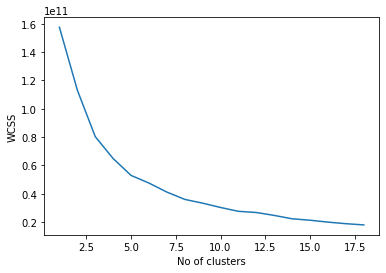

In [13]:
wcss = []
for i in range(1,19): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(data)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

- Optimal number of cluster=5 (elbow bend)

In [23]:
k5= KMeans(n_clusters=5)
k5.fit(data)
ypred5=k5.predict(data)
print(ypred5)

[1 1 1 1 2 1 1 1 1 0 0 1 2 2 2 1 0 1 2 1 2 1 2 0 2 2 1 1 0 2 2 1 2 2 1 1 2
 0 0 4 2 2 0 0 1 0 0 3 1 0 1 1 2 0 2 1 0 0 1 1 1 3 1 0 1 3 1 2 1 1 2 2 1 2
 1 2 1 0 1 1 1 0 1 2 1 3 3 4 1 2 1 1 0 1 0 1 1 1 1 1 0 0 1 4 1 2 0 0 1 0 1
 0 2 1 2 1 1 1 2 1 2 1 1 1 2 4 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 0 1 1
 1 2 2 1 2 1 1 0 0 2 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 4 1 1 1 1 4 0 4 1
 1 1 1 0 0 2 1 1 0 1 2 2 1 1 1 0 0 2 1 1 0 1 1 1 0 2 3 1 1 0 0 0 2 0 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 4 2 2 2 1 1 0 1 1 2 1 1 0 1 2 1 2 1 1 4
 4 1 1 2 1 0 0 0 2 0 1 1 1 1 2 1 1 2 1 1 2 1 1 4 2 4 2 1 2 2 2 1 1 1 0 2 1
 2 1 1 1 2 0 1 0 0 0 0 2 1 0 1 2 0 1 1 0 1 1 1 0 1 1 2 1 2 4 1 1 2 1 1 0 2
 3 2 2 1 1 1 1 1 1 1 0 1 1 0 2 1 0 1 0 1 0 1 1 2 0 1 1 2 1 1 1 1 1 1 1 2 1
 2 2 1 2 1 1 0 2 1 1 2 2 2 1 0 1 1 2 1 1 1 1 1 2 1 1 0 1 1 1 1 2 2 2 2 1 2
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 2 2 2 2 1 0 2 1 1 0 1 2 1 2 2 2 0 1 1]


In [24]:
df['Cls5']=ypred5
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cls5
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


In [25]:
df['Cls5'].value_counts()

1    233
2    106
0     81
4     13
3      7
Name: Cls5, dtype: int64

In [28]:
r=data.mean()
r

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [33]:
res=pd.DataFrame(r,columns=['Mean'])
res

,Mean
Fresh,12000.297727
Milk,5796.265909
Grocery,7951.277273
Frozen,3071.931818
Detergents_Paper,2881.493182
Delicassen,1524.870455


In [34]:
res1=df.iloc[:,2:].groupby(['Cls5']).mean().T
res1

Cls5,0,1,2,3,4
Fresh,4991.481481,6387.806867,23710.849057,20031.285714,56453.307692
Milk,12140.543210,3255.562232,3882.056604,38084.000000,10026.230769
Grocery,18505.506173,4056.562232,5169.311321,56126.142857,8739.000000
Frozen,1591.111111,2588.858369,3772.443396,2564.571429,15518.076923
Detergents_Paper,8148.246914,1199.330472,1118.264151,27644.571429,1258.230769
Delicassen,1822.407407,999.163090,1693.103774,2548.142857,7170.538462


In [35]:
res1['Mean']=res['Mean']
res1

Cls5,0,1,2,3,4,Mean
Fresh,4991.481481,6387.806867,23710.849057,20031.285714,56453.307692,12000.297727
Milk,12140.543210,3255.562232,3882.056604,38084.000000,10026.230769,5796.265909
Grocery,18505.506173,4056.562232,5169.311321,56126.142857,8739.000000,7951.277273
Frozen,1591.111111,2588.858369,3772.443396,2564.571429,15518.076923,3071.931818
Detergents_Paper,8148.246914,1199.330472,1118.264151,27644.571429,1258.230769,2881.493182
Delicassen,1822.407407,999.163090,1693.103774,2548.142857,7170.538462,1524.870455


In [36]:
res1=res1[['Mean',0,1,2,3,4]]
res1

Cls5,Mean,0,1,2,3,4
Fresh,12000.297727,4991.481481,6387.806867,23710.849057,20031.285714,56453.307692
Milk,5796.265909,12140.543210,3255.562232,3882.056604,38084.000000,10026.230769
Grocery,7951.277273,18505.506173,4056.562232,5169.311321,56126.142857,8739.000000
Frozen,3071.931818,1591.111111,2588.858369,3772.443396,2564.571429,15518.076923
Detergents_Paper,2881.493182,8148.246914,1199.330472,1118.264151,27644.571429,1258.230769
Delicassen,1524.870455,1822.407407,999.163090,1693.103774,2548.142857,7170.538462


### Analyzing Results

- For Delicassen we see that the avg sales is 1524.87, here for clusters 0,2,3,4 the customers are spending more than average (regular customers) but for cluster 1 we see that they are spending less. So, we need to provide customers in Cluster 1 with some discounts or offers to make them regular customers.